In [1]:
import gc
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm
import itertools

import seaborn as sbn

import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('code')

In [3]:
from utils import *

In [4]:
from optimizegrouping import OptmizeGrouping

In [5]:
raw_data = pd.read_csv('data/amex_sample_data.csv')

In [15]:
raw_data.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_115,D_118,D_119,D_121,D_122,D_123,D_124,D_125,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68,target,const
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,NaN,NaN,0.003258,0.070793,0.740102,0.231717,0.008309,0.420521,0.539715,0.192376,NaN,0.149564,0.058425,0.002927,0.153461,0.673522,0.009535,0.000085,0.203524,0.629392,0.326101,NaN,0.034643,0.010260,0.001770,1.008097,0.008517,0.105671,0.112294,0.488232,0.187285,0.166636,0.100107,0.009444,0.007174,0.007397,0.010239,0.063465,0.258461,0.227637,0.014553,0.402246,0.446568,0.008656,0.006408,NaN,1.007897,0.005274,0.007630,0.184036,0.003945,0.686719,0.005375,0.005469,0.008050,0.008254,0.377991,0.006970,0.304625,0.040367,NaN,0.006564,0.001298,0.001352,NaN,0.002230,0.009162,0.421334,0.006475,0.001068,0.000747,0.002193,0.006345,NaN,0.000026,0.208253,0.001057,0.009351,0.007236,0.009177,0.507423,0.006550,1.002178,0.084745,0.006099,0.000013,0.002902,0.001115,0.001911,0.003256,NaN,0.001277,0.009968,NaN,0.002330,0.002517,NaN,1,0.003511,0.008099,0.007645,0.009411,0.006355,0.008501,1.007528,0.004638,0.001445,0.003080,1.006011,0.003641,0.004638,0.003866,0.005909,0.005458,0.001190,0.917811,0.131801,0.936067,0.971994,0.001281,0.943340,1.002457,1.014510,1.073985,NaN,0.671683,0.007441,0.008676,NaN,1.006130,NaN,0.000226,NaN,NaN,NaN,1.009372,0.100454,0.928955,0.003658,0.255787,0.260255,0.256656,0.719791,0.433844,0.003580,0.684978,0.008398,1.008338,0.999737,1.008523,0.003973,NaN,0.004186,0.005702,NaN,0.006210,0.002715,NaN,NaN,NaN,NaN,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0,0,1
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,NaN,0.060646,0.008781,0.020626,0.266275,0.027000,0.004976,0.438828,0.402195,0.014696,NaN,0.167634,0.028411,0.000974,NaN,0.339683,0.012926,0.102036,0.242366,0.570898,0.297130,NaN,0.043929,0.014570,0.002911,1.002821,0.003283,0.208516,0.019050,0.406434,0.036112,0.748383,0.017684,0.005880,0.009756,0.127805,0.018667,0.212538,0.411989,0.048978,0.009538,0.363754,0.233980,0.008747,0.002940,NaN,1.003602,0.008047,0.004319,0.192371,0.007744,0.287101,0.006190,0.007636,0.006174,0.000883,0.007636,0.001278,0.304711,0.014705,NaN,0.004659,0.007925,0.009600,NaN,0.002383,0.008256,0.227755,0.021153,0.000182,0.001542,0.009117,0.006892,NaN,0.006931,0.002119,0.002046,0.009664,0.005375,0.005009,NaN,0.005414,1.008568,0.019672,0.006197,0.005370,0.006271,0.009911,0.000983,0.006669,NaN,0.009298,0.006460,NaN,0.006503,0.007052,NaN,1,0.005091,0.001838,0.008645,0.009467,0.003500,0.000473,1.000766,0.004864,0.000907,0.003830,0.009166,0.004641,0.000195,0.000523,0.006421,0.004975,0.002397,0.920889,0.132865,0.930629,0.977674,0.003213,0.001621,0.008952,0.004363,NaN,NaN,0.007774,0.007457,0.032899,NaN,1.007599,NaN,0.004743,NaN,NaN,NaN,1.006547,0.019811,0.292214,0.009312,0.454329,0.446036,0.436884,0.551341,0.286821,0.008603,0.136650,0.009314,0.000229,0.999252,0.001777,0.002943,NaN,0.002202,0.001928,NaN,0.002996,0.001701,NaN,NaN,NaN,NaN,NaN,0.002980,0.007

In [14]:
raw_data['const'] = 1

In [7]:
cc = OptmizeGrouping(data=raw_data, xname='S_3', yname='target')

In [8]:
cc.coarsebin_interval()

--------------------
  Begain Split  
--------------------
  Layer 1  Split  
--------------------
  Layer 2  Split  
--------------------
  Layer 3  Split  
--------------------
  Layer 3  Split  
--------------------
  Layer 2  Split  
--------------------
  Layer 3  Split  


,S_3_cut_point,Good,Bad,Total,Bad_Rate,%Good,%Bad,%Good(cum),%Bad(cum),WOE,IV,Odds
0,Null,987,71,1058,0.067108,0.161909,0.032302,0.161909,0.161909,1.611905,0.208915,13.901408
0,0.090249,690,34,724,0.046961,0.113189,0.015469,0.275098,0.275098,1.990246,0.194488,20.294118
1,0.130778,970,115,1085,0.105991,0.159121,0.052320,0.434219,0.434219,1.112279,0.118792,8.434783
2,0.155649,869,216,1085,0.199078,0.142552,0.098271,0.576772,0.576772,0.371980,0.016472,4.023148
3,0.172502,807,279,1086,0.256906,0.132382,0.126934,0.709154,0.709154,0.042027,0.000229,2.892473
4,0.262756,947,500,1447,0.345543,0.155348,0.227480,0.864501,0.864501,-0.381394,0.027511,1.894000
5,0.363223,403,321,724,0.443370,0.066109,0.146042,0.930610,0.930610,-0.792590,0.063354,1.255452
6,2.581047,423,662,1085,0.610138,0.069390,0.301183,1.000000,1.000000,-1.467978,0.340267,0.638973


In [9]:
cc = OptmizeGrouping(data=raw_data, xname='D_63', yname='target')

In [10]:
cc.coarsebin_norminal()

,CutPoint,Good,Bad,Total,Bad_Rate,%Good,%Bad,%Good(cum),%Bad(cum),WOE,IV,Odds
0,0.180292,1123,247,1370,0.180292,0.184219,0.112375,0.184219,0.184219,0.494286,0.035512,4.546559
1,0.271186,43,16,59,0.271186,0.007054,0.007279,0.191273,0.191273,-0.031474,0.000007,2.687500
2,0.275182,4483,1702,6185,0.275182,0.735400,0.774340,0.926673,0.926673,-0.051597,0.002009,2.633960
3,0.315789,13,6,19,0.315789,0.002133,0.002730,0.928806,0.928806,-0.246895,0.000147,2.166667
4,0.343260,419,219,638,0.343260,0.068734,0.099636,0.997539,0.997539,-0.371286,0.011474,1.913242
5,0.347826,15,8,23,0.347826,0.002461,0.003640,1.000000,1.000000,-0.391476,0.000462,1.875000


In [11]:
from eda import *

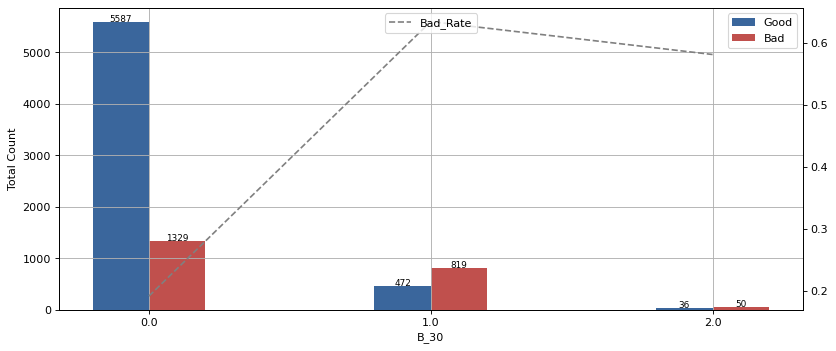

In [12]:
categorical_analysis_plot(df=raw_data,
                          categorical_var="B_30",
                          target='target'
                         )

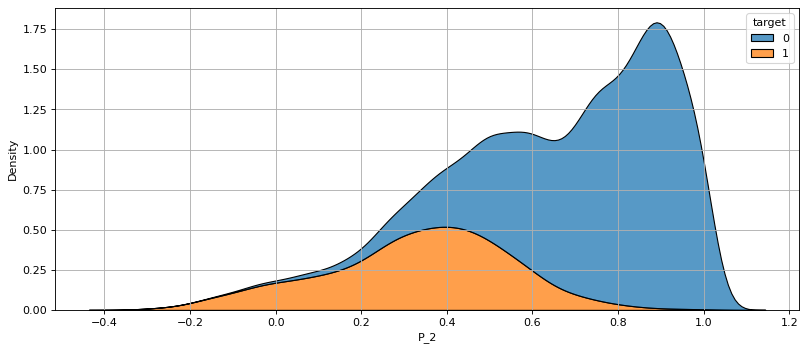

In [13]:
numerical_analysis_plot(raw_data=raw_data,
                          numerical_var="P_2",
                          target='target'
                         )